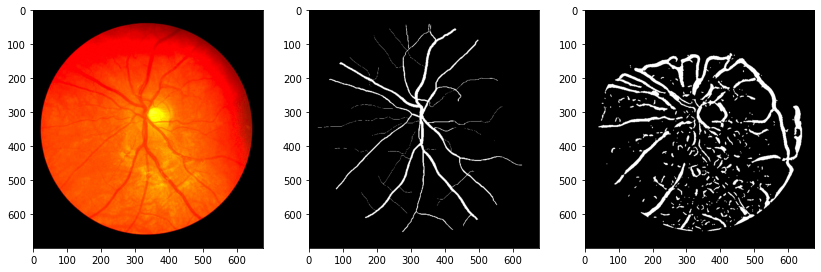

true positives = 6793
true negatives = 418694
false positives = 37378
false negatives = 11035
accuracy = 0.8978413167334881
sensitivity = 0.38102984070002244
specificity = 0.9180436422319282


In [6]:
from matplotlib import pyplot as plt
from skimage import img_as_float
from skimage.transform import rescale
import skimage.io as io
from skimage.filters import frangi, sobel, threshold_otsu
from skimage.morphology import erosion, dilation
from sklearn.metrics import confusion_matrix

idx = 3
img = img_as_float(io.imread(f'test_res/test{idx}.jpg'))
img = img[:, :, 1]
img = rescale(img, 1, anti_aliasing=False)

i = 0
while i < len(img):
    j = 0
    while j < len(img[i]):
        if img[i][j] > 0.6:
            img[i][j] = 0.3
            if i < len(img) - 1:
                img[i + 1][j] = 0.3
            if j < len(img[i]) - 1:
                img[i][j + 1] = 0.3
            if i > 0:
                img[i - 1][j] = 0.3
            if j > 0:
                img[i][j - 1] = 0.3

            if i < len(img) - 2:
                img[i + 2][j] = 0.3
            if j < len(img[i]) - 2:
                img[i][j + 2] = 0.3
            if i > 1:
                img[i - 2][j] = 0.3
            if j > 0:
                img[i][j - 2] = 0.3
        j += 1
    i += 1


i = 0
while i < len(img):
    j = 0
    while j < len(img[i]):
        value = 0.4
        if img[i][j] < 0.05:
            img[i][j] = value
            for k in range(1, 10):
                if i < len(img) - k:
                    img[i + k][j] = value
                if j < len(img[i]) - k:
                    img[i][j + k] = value
                if i > k - 1:
                    img[i - k][j] = value
                if j > k - 1:
                    img[i][j - k] = value
                if j < len(img[i]) - k and i < len(img) - k:
                    img[i + k][j + k] = value
                if j < len(img[i]) - k and i > k - 1:
                    img[i - k][j + k] = value
                if j > k - 1 and i > k - 1:
                    img[i - k][j - k] = value
                if j > k - 1 and i < len(img) - k:
                    img[i + k][j - k] = value
        j += 1
    i += 1


img = sobel(img)

i = 0
while i < len(img):
    j = 0
    while j < len(img[i]):

        if (img[i][j] > 0.02):
            img[i][j] = 0.9
        j += 1
    i += 1

img = frangi(img, black_ridges=False)

border = 0
i = 0
while True:
    if img[len(img)//2][i] > 0:
        border = i + 17
        break
    i += 1

width = len(img[0])
height = len(img)

r = (width - 2 * border) // 2
i = 0
center = [width // 2, height // 2]
while i < len(img):
    j = 0
    while j < len(img[i]):
        if r < ((i - center[1]) ** 2 + (j - center[0]) ** 2) ** (1/2):
            img[i][j] = 0
        j += 1
    i += 1


thresh = threshold_otsu(img)
img = img > thresh
img = erosion(img)
img = dilation(img)

good = img_as_float(io.imread(f'test_res/res{idx}.jpg'))[:, :, 1]
i = 0
while i < len(good):
    j = 0
    while j < len(good[i]):
        if good[i][j] > 0.9:
            good[i][j] = 1
        else:
            good[i][j] = 0
        j += 1
    i += 1

fig, axs = plt.subplots(1, 3)
axs[0].imshow(img_as_float(io.imread(f'test_res/test{idx}.jpg')), cmap="gray")
axs[1].imshow(good, cmap="gray")
axs[2].imshow(img, cmap="gray")
fig.set_size_inches(14, 10)
plt.show()
tn, fp, fn, tp = confusion_matrix(good.flatten(), img.flatten()).ravel()
print(f"true positives = {tp}")
print(f"true negatives = {tn}")
print(f"false positives = {fp}")
print(f"false negatives = {fn}")
print(f"accuracy = {(tn + tp)/(tn + tp + fn + fp)}")
print(f"sensitivity = {tp/(tp + fn)}")
print(f"specificity = {tn/(tn + fp)}")